<a href="https://colab.research.google.com/github/nberry5/DCS-210/blob/main/Berry_proj6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")


In [ ]:
install.packages("tidymodels")


In [ ]:
install.packages("openintro")

In [93]:
library(tidyverse)
library(tidymodels)
library(openintro)

In [5]:
set.seed(5551212)

In [7]:
data(ncbirths)

In [74]:
?ncbirths

In [ ]:
summary(ncbirths)

In [11]:
# cases are births, there are 1,000 cases

In [13]:
str(ncbirths)

tibble [1,000 × 13] (S3: tbl_df/tbl/data.frame)
 $ fage          : int [1:1000] NA NA 19 21 NA NA 18 17 NA 20 ...
 $ mage          : int [1:1000] 13 14 15 15 15 15 15 15 16 16 ...
 $ mature        : Factor w/ 2 levels "mature mom","younger mom": 2 2 2 2 2 2 2 2 2 2 ...
 $ weeks         : int [1:1000] 39 42 37 41 39 38 37 35 38 37 ...
 $ premie        : Factor w/ 2 levels "full term","premie": 1 1 1 1 1 1 1 2 1 1 ...
 $ visits        : int [1:1000] 10 15 11 6 9 19 12 5 9 13 ...
 $ marital       : Factor w/ 2 levels "not married",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gained        : int [1:1000] 38 20 38 34 27 22 76 15 NA 52 ...
 $ weight        : num [1:1000] 7.63 7.88 6.63 8 6.38 5.38 8.44 4.69 8.81 6.94 ...
 $ lowbirthweight: Factor w/ 2 levels "low","not low": 2 2 2 2 2 1 2 1 2 2 ...
 $ gender        : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 2 2 2 1 ...
 $ habit         : Factor w/ 2 levels "nonsmoker","smoker": 1 1 1 1 1 1 1 1 1 1 ...
 $ whitemom      : Factor w/ 2 levels "not whit

In [14]:
# The variables of type Factor above are categorical.
# Those of type int and num are numerical.

In [16]:
ncbirths_white <- ncbirths %>%
  filter(whitemom == "white")

In [17]:
summary(ncbirths_white)

      fage            mage               mature        weeks      
 Min.   :14.00   Min.   :15.00   mature mom :103   Min.   :22.00  
 1st Qu.:26.00   1st Qu.:23.00   younger mom:611   1st Qu.:38.00  
 Median :31.00   Median :27.50                     Median :39.00  
 Mean   :30.69   Mean   :27.65                     Mean   :38.51  
 3rd Qu.:35.00   3rd Qu.:32.00                     3rd Qu.:40.00  
 Max.   :50.00   Max.   :50.00                     Max.   :45.00  
 NA's   :77                                        NA's   :2      
       premie        visits            marital        gained     
 full term:616   Min.   : 0.0   not married:203   Min.   : 0.00  
 premie   : 96   1st Qu.:10.0   married    :510   1st Qu.:22.00  
 NA's     :  2   Median :12.0   NA's       :  1   Median :30.00  
                 Mean   :12.3                     Mean   :30.98  
                 3rd Qu.:15.0                     3rd Qu.:40.00  
                 Max.   :30.0                     Max.   :85.00  
  

In [20]:
# mean weight is 7.25, which is slightly higher than the overall mean of 7.101.

In [47]:
# yes, because the sample size is still 714, giving enough space for sampling
# without worrying about skew.

In [ ]:
t.test(weight, data = ncbirths_white, mu = 7.43, alternative = "two.sided")

In [100]:
# with a p-value below .05, we can say that the mean weight of caucasian
# babies (with the assumption that babies with white moms are white) is 
# significantly different from the mean weight of 7.43 pounds from 1995.

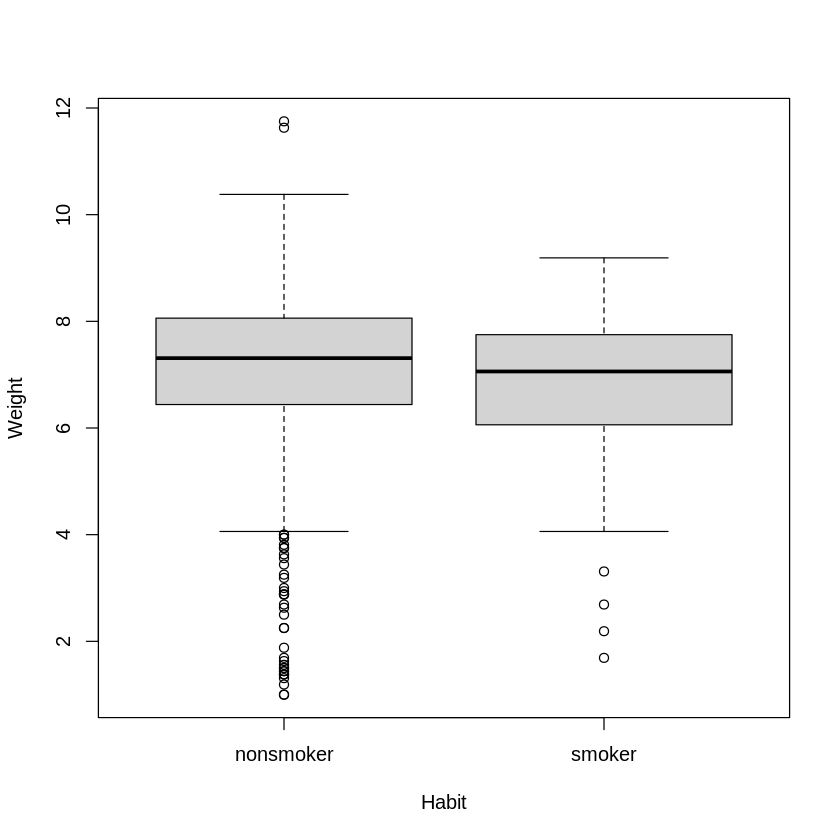

In [24]:
boxplot(weight ~ habit, data = ncbirths, xlab = "Habit", ylab = "Weight")

In [25]:
# the nonsmoker distribution is right-skewed. The smoker one does have a few
# outliers, but the nonsmoker is more dramatic.

In [29]:
ncbirths_habitgiven <- na.omit(ncbirths)

In [31]:
ncbirths_habitgiven %>%
  group_by(habit) %>%
  summarise(mean_weight = mean(weight))

habit,mean_weight
<fct>,<dbl>
nonsmoker,7.246760
smoker,6.886429


H0: *u*(smoking) == *u*(nonsmoking) \
HA: *u*(smoking) != *u*(nonsmoking)

In [36]:
ncbirths %>%
   group_by(habit) %>%
   summarise(group_size = n())

habit,group_size
<fct>,<int>
nonsmoker,873
smoker,126
NA,1


In [22]:
# The conditions are sufficient to conduct simulation based inference.
# The sample size is large enough that skew is not a concern.

In [60]:
t.test(weight ~ habit, data = ncbirths, conf.level = 0.95)


	Welch Two Sample t-test

data:  weight by habit
t = 2.359, df = 171.32, p-value = 0.01945
alternative hypothesis: true difference in means between group nonsmoker and group smoker is not equal to 0
95 percent confidence interval:
 0.05151165 0.57957328
sample estimates:
mean in group nonsmoker    mean in group smoker 
               7.144273                6.828730 


In [64]:
# this is a statistically significant result, where we can be 95% confident
# that the difference between the means of smokers' baby weight and nonsmokers'
# baby weights is between 0.05 and 0.58.

In [85]:
ncbirths_mature <- ncbirths %>%
  filter(mature == "mature mom")

In [ ]:
ncbirths_mature

In [87]:
# the cutoff age is 34-35. By filtering the data on the mature variable,
# one can see that the lowest age for "mature moms" is 35, while the oldest
# for "younger moms" is 34.

In [88]:
t.test(weight ~ mature, data = ncbirths, conf.level = 0.95)


	Welch Two Sample t-test

data:  weight by mature
t = 0.18584, df = 166.08, p-value = 0.8528
alternative hypothesis: true difference in means between group mature mom and group younger mom is not equal to 0
95 percent confidence interval:
 -0.2726579  0.3293220
sample estimates:
 mean in group mature mom mean in group younger mom 
                 7.125564                  7.097232 


In [89]:
# there is no statistically significant difference between the mean weight of
# a younger mom's baby and the mean weight of an older mom's baby.